# CIA Factbook Data Analysis

This project will discover insights from the CIA World Factbook, which contains information about each country, such as population, land area, growth, and more.

In [3]:
import pandas as pd
import sqlite3

# connect to the database file
conn = sqlite3.connect('factbook.db')

# query sqlite_master for information on the tables in the database
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
# return the first 5 rows from the facts table
query_1 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(query_1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
# return some summary statistics about the countries in the facts table
stats_query = """
    SELECT MIN(population), 
    MAX(population), 
    MIN(population_growth), 
    MAX(population_growth)
    FROM facts
"""
pd.read_sql_query(stats_query, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Initial Findings

There exists in the table countries with a population and population growth of 0, and also a country whose apparent population is approximatley 7.2 billion.

In [8]:
# explore zero population country
pop_zero = """
    SELECT *
    FROM facts
    WHERE population = 0;
"""

pd.read_sql_query(pop_zero, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [9]:
# explore highest population country
highest_pop = """
    SELECT *
    FROM facts
    ORDER BY population DESC
    LIMIT 1;
"""

pd.read_sql_query(highest_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


# Additional Findings

As shown in the queries above, the country with the population of 0 is Antarctica, and the record in the table with the population of approximately 7.2 billion is the whole world, not a specific country.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58002a6550>]],
      dtype=object)

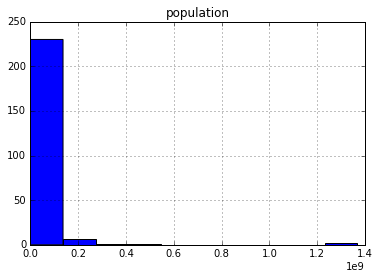

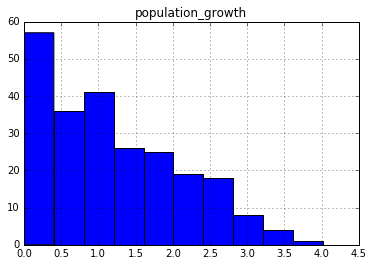

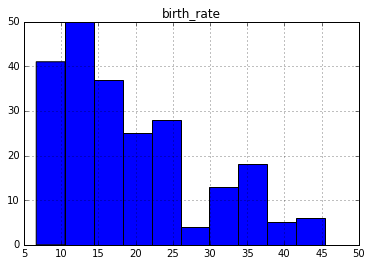

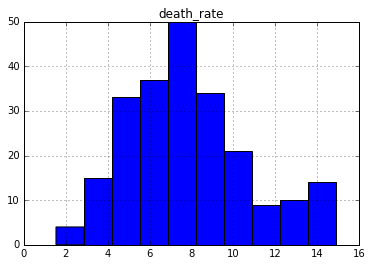

In [22]:
%matplotlib inline
# visualize statistics for each country in the facts table
non_outlier_countries = """
    SELECT *
    FROM facts
    WHERE name NOT IN('Antarctica', 'World')
"""

countries_df = pd.read_sql_query(non_outlier_countries, conn)

# create subset dataframes
population = countries_df[['name', 'population']]
population_growth = countries_df[['name', 'population_growth']]
birth_rate = countries_df[['name', 'birth_rate']]
death_rate = countries_df[['name', 'death_rate']]

# plot histograms
population.hist()
population_growth.hist()
birth_rate.hist()
death_rate.hist()

In [27]:
# countries with the highest population density
density = """
    SELECT name, 
    ROUND(CAST(population AS Float) / CAST(area_land AS Float), 2) population_density
    FROM facts
    ORDER BY population_density DESC
    LIMIT 10;
"""
pop_density = pd.read_sql_query(density, conn)
pd.read_sql_query(density, conn)

,name,population_density
0,Macau,21168.96
1,Monaco,15267.50
2,Singapore,8259.78
3,Hong Kong,6655.27
4,Gaza Strip,5191.82
5,Gibraltar,4876.33
6,Bahrain,1771.86
7,Maldives,1319.64
8,Malta,1310.02
9,Bermuda,1299.93


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58006e6c88>]],
      dtype=object)

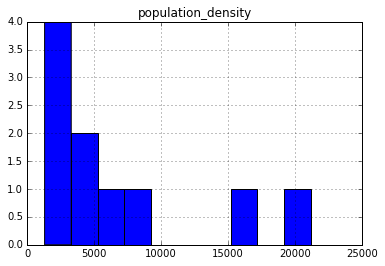

In [28]:
# visualize population density
pop_density.hist()

# Conclusion

As shown from the visualizations as queries above, Macau and Monaco easily have the highest population densities. Most countries have a death rate between 6 and 10, a birth rate between 5 and 20, population growth between 0 and 1.5, and population between 0 and 2 million.